In [1]:
#Loeme andmed sisse ja vvlime esialu ainult 5 riiki
import pandas as pd
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import numpy as np
from sklearn import preprocessing
covidDeath = pd.read_csv('time_series_covid19_deaths_global+.csv', sep=",")
#covidDeath.head(10)

#osa = covidDeath.loc[(covidDeath['Country/Region'] == 'Estonia') |  (covidDeath['Country/Region'] == 'Lithuania') | (covidDeath['Country/Region'] == 'Finland')| (covidDeath['Country/Region'] == 'Sweden') | (covidDeath['Country/Region'] == 'Lithuania') | (covidDeath['Country/Region'] == 'New Zealand')]
#osa

In [2]:
##Koristame hetkel ebavajaliku info
vahendatud = covidDeath.copy()
vahendatud = vahendatud.drop('Province/State', axis = 'columns')
vahendatud =  vahendatud.drop('Lat', axis = 'columns')
vahendatud =  vahendatud.drop('Long', axis = 'columns')
vahendatud = vahendatud.set_index('Country/Region')
#ind = ['Est', 'Fin', 'Lit', 'NZe','Swe']
#vahendatud['index'] = ind
#vahendatud = vahendatud.set_index('index')
vahendatud

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2253,2257,2264,2277,2288,2301,2301,2314,2324,2336
Albania,0,0,0,0,0,0,0,0,0,0,...,1223,1230,1233,1241,1247,1252,1256,1261,1265,1270
Algeria,0,0,0,0,0,0,0,0,0,0,...,2792,2798,2803,2807,2812,2816,2819,2822,2827,2831
Andorra,0,0,0,0,0,0,0,0,0,0,...,84,84,85,85,85,86,87,88,88,91
Angola,0,0,0,0,0,0,0,0,0,0,...,413,415,416,416,420,422,424,425,428,431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,1536,1559,1583,1604,1614,1630,1658,1665,1687,1700
Yemen,0,0,0,0,0,0,0,0,0,0,...,610,610,610,611,612,612,612,612,612,612


In [3]:
## Standardiseerimine Eesti huvipakkuva lõigu ära.
eesti_vord = np.array([vahendatud['12/26/20']['Estonia'],vahendatud['12/27/20']['Estonia'],vahendatud['12/29/20']['Estonia'],vahendatud['12/30/20']['Estonia'],vahendatud['12/31/20']['Estonia'],vahendatud['1/1/21']['Estonia'],vahendatud['1/2/21']['Estonia'],vahendatud['1/3/21']['Estonia'],vahendatud['1/4/21']['Estonia'],vahendatud['1/5/21']['Estonia'],vahendatud['1/6/21']['Estonia'],vahendatud['1/7/21']['Estonia'], vahendatud['1/8/21']['Estonia'], vahendatud['1/9/21']['Estonia'],vahendatud['1/10/21']['Estonia'],vahendatud['1/11/21']['Estonia'],vahendatud['1/12/21']['Estonia'],vahendatud['1/13/21']['Estonia'],vahendatud['1/14/21']['Estonia'],vahendatud['1/15/21']['Estonia'],vahendatud['1/16/21']['Estonia']])
standardized_l = (eesti_vord-eesti_vord.mean())/eesti_vord.std()
eesti_vordlus = standardized_l
eesti_vordlus

array([-1.67351283, -1.67351283, -1.18057217, -1.03558962, -0.94860009,
       -0.80361755, -0.60064198, -0.51365245, -0.31067689, -0.10770132,
       -0.02071179,  0.09527425,  0.24025679,  0.47222887,  0.61721141,
        0.73319745,  0.87818   ,  1.13914858,  1.42911368,  1.57409622,
        1.69008226])

In [40]:
def kaugused(data, riik, riiginimi):
    #print(riiginimi)
    riik1_ = {}
    riik1={}
    for a in range (0,361):
        vahe = 0
        for b in range (a, 361):
            vahe = vahe +1
            if vahe < 22:
                riik1_.setdefault(a,[]).append(data.iloc[riik, b])
            else:
                break
                
    for k in riik1_.keys():
        if len(riik1_[k]) == 21:
            riik1.setdefault(k,riik1_[k])
    
    
    riik_standard = {}
    for e in riik1.keys():
        l_np = np.array(riik1[e])
        standardized_l = (l_np-l_np.mean())/l_np.std()
        if (np.isnan(standardized_l).any() == False):
            riik_standard.setdefault(e,standardized_l.tolist())
        else:
            pass
    
    #print(soome_standard)
    kaugused = {}
    for k in riik_standard.keys():
        distance, path = fastdtw(eesti_vordlus, riik_standard[k], dist=euclidean)
        kaugused.setdefault(distance,[]).append(k)
    
    koguSonastik = {}
    #for s in sorted(kaugused)[:1]:
        #print(str(riiginimi)  + ' ' + str(s) + ' ' + str(kaugused[s]))
        #koguSonastik.setdefault(kaugused[s], riiginimi)
    #print(sorted(kaugused)[:1])
    return riiginimi, (float(sorted(kaugused)[:1][0]))
    #return riik_standard

In [44]:
#vaste = kaugused(vahendatud, 1, "Soome")
#print()
#vaste[92]
koguSonastik = {}
for i, r in vahendatud.iterrows():
    index = (i)
    indexNumber = (vahendatud.index.get_loc(i))
    #kaugused(vahendatud, indexNumber, str(index))
    try:
        riiginimi, vaartus =kaugused(vahendatud, indexNumber, str(index))
        koguSonastik.setdefault(vaartus, riiginimi)
    #print(vaartus)
    except:
        pass


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


In [55]:
for s in(sorted(koguSonastik.keys())[:100]):
    print(str(koguSonastik[s]) + "  " + str(s))

Estonia  0.5836727923728925
South Africa  0.8366741574335597
Paraguay  0.8409792198786655
Ukraine  0.8490579047804789
Israel  0.8883912438086636
Indonesia  0.8892092743216016
Azerbaijan  0.9095748339303139
North Macedonia  0.9225089742115253
Chile  0.9294328820279927
Bosnia and Herzegovina  0.9312987292631739
Montenegro  0.9323464461357583
Moldova  0.9401990022228593
Romania  0.9516801058712028
Belarus  0.9625848885297948
Bolivia  0.9662215504374094
Japan  0.9911754694191621
Iran  0.9973961331202462
Turkey  1.0005318517784394
Uzbekistan  1.003855846800028
Poland  1.0065567320846127
Senegal  1.0094243523940625
Syria  1.014628491818326
Bangladesh  1.015409269726428
Albania  1.0255627143137365
Iraq  1.0300228878093616
Czechia  1.0351327741199552
Kosovo  1.0374553096244488
Saudi Arabia  1.037470138421985
Venezuela  1.0391466275935661
Morocco  1.0401678290276357
Ethiopia  1.0406372033725628
Ireland  1.0460790772788162
Mexico  1.0464957946355875
Panama  1.050260920179689
Algeria  1.051764221

In [45]:
#võtab 10 kõige sarnasemat riiki
#Seejärel otsib nende a

In [57]:
southAfricaIndex = vahendatud.index.get_loc("South Africa")
paraguayIndex = vahendatud.index.get_loc("Paraguay")
ukraineIndex = vahendatud.index.get_loc("Ukraine")
israelIndex = vahendatud.index.get_loc("Israel")
paraguayIndex

205

In [66]:
def konkreetneKaugus(data, riik, riiginimi):
    #print(riiginimi)
    riik1_ = {}
    riik1={}
    for a in range (0,361):
        vahe = 0
        for b in range (a, 361):
            vahe = vahe +1
            if vahe < 22:
                riik1_.setdefault(a,[]).append(data.iloc[riik, b])
            else:
                break
                
    for k in riik1_.keys():
        if len(riik1_[k]) == 21:
            riik1.setdefault(k,riik1_[k])
    
    
    riik_standard = {}
    for e in riik1.keys():
        l_np = np.array(riik1[e])
        standardized_l = (l_np-l_np.mean())/l_np.std()
        if (np.isnan(standardized_l).any() == False):
            riik_standard.setdefault(e,standardized_l.tolist())
        else:
            pass
    
    #print(soome_standard)
    kaugused = {}
    for k in riik_standard.keys():
        distance, path = fastdtw(eesti_vordlus, riik_standard[k], dist=euclidean)
        kaugused.setdefault(distance,[]).append(k)
    
    
    for s in sorted(kaugused)[:1]:
        print(str(riiginimi)  + ' ' + str(s) + ' ' + str(kaugused[s]))
        
    return riik_standard
    

In [103]:
lounaAafrika = konkreetneKaugus(vahendatud,vahendatud.index.get_loc("South Africa"),"South Africa")
para = konkreetneKaugus(vahendatud,vahendatud.index.get_loc("Paraguay"),"Paraguay")
ukr = konkreetneKaugus(vahendatud,vahendatud.index.get_loc("Ukraine"),"Ukraine")
isr = konkreetneKaugus(vahendatud,vahendatud.index.get_loc("Israel"),"Israel")
swe = konkreetneKaugus(vahendatud,vahendatud.index.get_loc("Sweden"),"Sweden")
lit = konkreetneKaugus(vahendatud,vahendatud.index.get_loc("Lithuania"),"Lithuania")
jama = konkreetneKaugus(vahendatud,vahendatud.index.get_loc("Jamaica"),"Jamaica")


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


South Africa 0.8366741574335597 [136]
Paraguay 0.8409792198786655 [242]
Ukraine 0.8490579047804789 [123]
Israel 0.8883912438086636 [287]
Sweden 1.214046861314417 [74]
Lithuania 1.2126542487745393 [319]
Jamaica 1.3581652181109738 [245]


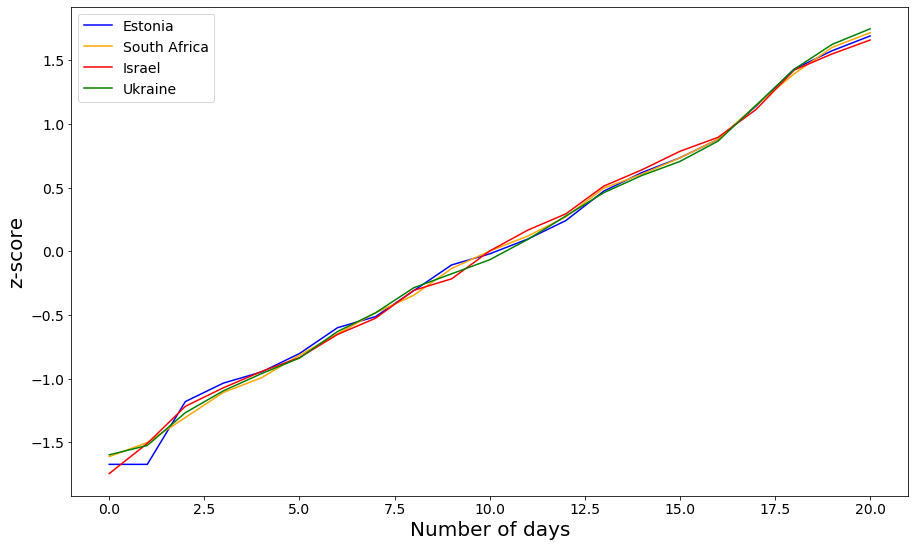

In [301]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(15,9))


#x = np.arange(0, 10, 0.1)
isra = isr[287]
parag  = para[242]
eesti_ = eesti_vordlus.tolist()
jamai = jama[245]
swed = swe[74]
ukraine = ukr[123]
africa = lounaAafrika[136]

ax.plot(eesti_, color='blue', label='Estonia')
ax.plot(africa, color='orange', label='South Africa')
ax.plot(isra,  color='red', label='Israel')
#ax.plot(parag, color='black', label='Paraguay')
ax.plot(ukraine, color='green', label='Ukraine')



leg = ax.legend(fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of days', fontsize=20)
plt.ylabel('z-score', fontsize=20)
#plt.title('COVID-19 death related z-score', fontsize=20)
plt.show()

In [229]:
#fig, ax = plt.subplots()

#x = np.arange(0, 10, 0.1)
iisrael = vahendatud.iloc[vahendatud.index.get_loc("Israel"), 287: 308]
afr = vahendatud.iloc[vahendatud.index.get_loc("South Africa"), 136: 157]



In [278]:
##Teeme dataframe absoluutväärtuste jaoks.
osa = covidDeath.loc[(covidDeath['Country/Region'] == 'Estonia') |  (covidDeath['Country/Region'] == 'South Africa') | (covidDeath['Country/Region'] == 'Israel')| (covidDeath['Country/Region'] == 'Ukraine') | (covidDeath['Country/Region'] == 'Lithuania') ]
osa = osa.drop('Province/State', axis = 'columns')
osa =  osa.drop('Lat', axis = 'columns')
osa =  osa.drop('Long', axis = 'columns')
osa = osa.set_index('Country/Region')
osa

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Estonia,0,0,0,0,0,0,0,0,0,0,...,265,270,278,283,287,292,301,311,316,320
Israel,0,0,0,0,0,0,0,0,0,0,...,3552,3596,3645,3671,3704,3771,3817,3870,3910,3959
Lithuania,0,0,0,0,0,0,0,0,0,0,...,2076,2119,2171,2197,2232,2272,2314,2346,2376,2414
South Africa,0,0,0,0,0,0,0,0,0,0,...,31809,32425,32824,33163,33579,34334,35140,35852,36467,36851
Ukraine,0,0,0,0,0,0,0,0,0,0,...,20334,20432,20526,20641,20719,20915,21121,21300,21479,21637


In [279]:
osa2 = osa.copy()
osa2.loc['Estonia'] = osa.loc['Estonia'].div(1328976)
osa2.loc['Israel'] = osa.loc['Israel'].div(9311200)
osa2.loc['Lithuania'] = osa.loc['Lithuania'].div(2795175)
osa2.loc['South Africa'] = osa.loc['South Africa'].div(59622350)
osa2.loc['Ukraine'] = osa.loc['Ukraine'].div(41670812)




In [280]:
osa2

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Estonia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000199,0.000203,0.000209,0.000213,0.000216,0.000220,0.000226,0.000234,0.000238,0.000241
Israel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000381,0.000386,0.000391,0.000394,0.000398,0.000405,0.000410,0.000416,0.000420,0.000425
Lithuania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000743,0.000758,0.000777,0.000786,0.000799,0.000813,0.000828,0.000839,0.000850,0.000864
South Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000534,0.000544,0.000551,0.000556,0.000563,0.000576,0.000589,0.000601,0.000612,0.000618
Ukraine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000488,0.000490,0.000493,0.000495,0.000497,0.000502,0.000507,0.000511,0.000515,0.000519


In [283]:
df = osa2.T
df = df.reset_index()
df= df.rename(columns={"index":"Date"})
df = df.drop('Lithuania', axis = 'columns')


In [298]:
df3 = df.copy()
df3 = df3.set_index('Date')
df3

Country/Region,Estonia,Israel,South Africa,Ukraine,EestiLõik,IisraelLoik,AfrLoik,UkrLoik
Date,,,,,,,,
1/22/20,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1/23/20,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1/24/20,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1/25/20,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1/26/20,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1/12/21,0.000220,0.000405,0.000576,0.000502,0.000216,NaN,NaN,NaN
1/13/21,0.000226,0.000410,0.000589,0.000507,0.000220,NaN,NaN,NaN
1/14/21,0.000234,0.000416,0.000601,0.000511,0.000226,NaN,NaN,NaN


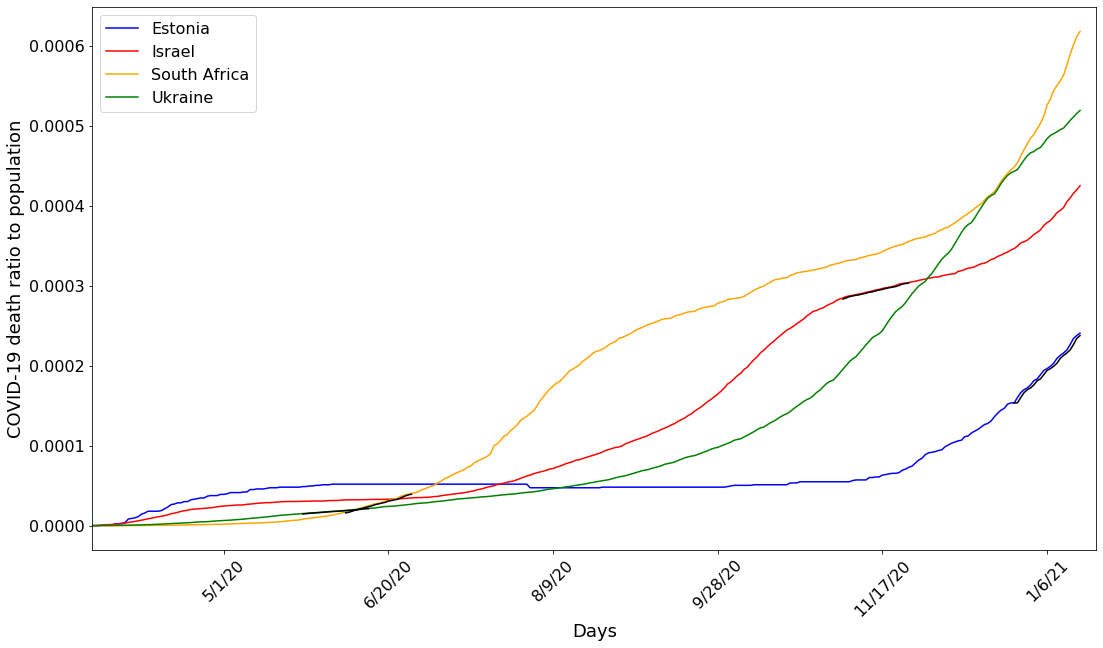

In [302]:
df3.plot(color = ["blue", "red", "orange", "green", "black", "black", "black", "black", "black"], kind = 'line', figsize = (18,10), rot = 45)

#plt.xticks(df.index, df.Date, fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.locator_params(axis='y', nbins=10)
plt.locator_params(axis='x', nbins=20)
plt.xlim(60, 365)
plt.xlabel('Days', fontsize=18)
plt.ylabel('COVID-19 death ratio to population', fontsize=18)
plt.legend((['Estonia', 'Israel', 'South Africa', 'Ukraine']),fontsize = 16)

In [292]:
listike = [None] * 340
listike = listike + df.Estonia[339:360].tolist()
df['EestiLõik'] = listike

iisLoik1 = [None] * 288
iisVaartus = df.Israel[287:308].tolist()
iisLoik2 = [None] * 52
df['IisraelLoik'] = (iisLoik1 + iisVaartus + iisLoik2)

afrLoik1 = [None] * 137
afrVaartus = df['South Africa'][136:157].tolist()
afrLoik2 = [None] * 203
df['AfrLoik'] = (afrLoik1 + afrVaartus + afrLoik2)

ukrLoik1 = [None] * 124
ukrVaartus = df['Ukraine'][123:144].tolist()
ukrLoik2 = [None] * 216
df['UkrLoik'] = (ukrLoik1 + ukrVaartus + ukrLoik2)

In [252]:
litLoik1 = [None] * 320
litVaartus = df['Lithuania'][319:340].tolist()
litLoik2 = [None] * 20
df['LitLoik'] = (litLoik1 + litVaartus + litLoik2)



In [253]:
df

Country/Region,Date,Estonia,Israel,Lithuania,South Africa,Ukraine,EestiLõik,IisraelLoik,AfrLoik,UkrLoik,LitLoik
0,1/22/20,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2,1/24/20,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
3,1/25/20,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4,1/26/20,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
356,1/12/21,0.000220,0.000405,0.000813,0.000576,0.000502,0.000216,NaN,NaN,NaN,NaN
357,1/13/21,0.000226,0.000410,0.000828,0.000589,0.000507,0.000220,NaN,NaN,NaN,NaN
358,1/14/21,0.000234,0.000416,0.000839,0.000601,0.000511,0.000226,NaN,NaN,NaN,NaN
359,1/15/21,0.000238,0.000420,0.000850,0.000612,0.000515,0.000234,NaN,NaN,NaN,NaN


In [ ]:
isra = isr[287]
parag  = para[242]
eesti_ = eesti_vordlus.tolist()
jamai = jama[245]
swed = swe[74]
ukraine = ukr[123]
africa = lounaAafrika[136]